In [2]:
# a. Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
# b. Upload / access the dataset (Credit card anomaly dataset recommended)

data = pd.read_csv("dataset/creditcardfraud-csv/creditcard.csv")

print("Dataset shape:", data.shape)
print(data["Class"].value_counts())

# Split features/labels
X = data.drop("Class", axis=1)
y = data["Class"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Only NORMAL samples for training
X_normal = X_scaled[y == 0]

# Train-validation split
X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

print("Training data:", X_train.shape)
print("Validation data:", X_val.shape)

Dataset shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64
Training data: (227452, 30)
Validation data: (56863, 30)


In [8]:
# c. Build Encoder (input → latent representation)

input_dim = X_train.shape[1]
latent_dim = 16

input_layer = Input(shape=(input_dim,))

encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
latent = Dense(latent_dim, activation='relu')(encoded)

In [9]:
# d. Build Decoder (latent → reconstruct input)

decoded = Dense(16, activation='relu')(latent)
decoded = Dense(32, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,598 (14.05 KB)

 Trainable params: 3,598 (14.05 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# e. Compile the model: Optimizer, Loss, and Metrics

autoencoder.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

# Train the model
history = autoencoder.fit(
    X_train, X_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, X_val),
    verbose=1
)

print("\nAutoencoder training complete.")

Epoch 1/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.4446 - mae: 0.4423 - val_loss: 0.2848 - val_mae: 0.3483
Epoch 2/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.2373 - mae: 0.3160 - val_loss: 0.2155 - val_mae: 0.2908
Epoch 3/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1901 - mae: 0.2750 - val_loss: 0.1875 - val_mae: 0.2682
Epoch 4/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1585 - mae: 0.2466 - val_loss: 0.1523 - val_mae: 0.2329
Epoch 5/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1423 - mae: 0.2310 - val_loss: 0.1508 - val_mae: 0.2358
Epoch 6/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.1266 - mae: 0.2226 - val_loss: 0.1148 - val_mae: 0.2127
Epoch 7/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.1153 - mae: 0.2155 - val_loss: 0.1205 - val_mae: 0.2306
Epoch 8/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.1102 - mae: 0.2094 - val_loss: 0.1125 - val_mae: 0.2163
Epoch 9/20
3554/3554 ━━━━━━━━━━━

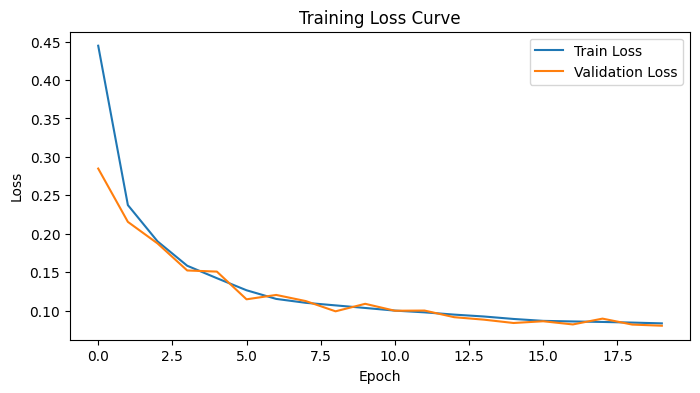

In [12]:
# Plot Training Loss Curve

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


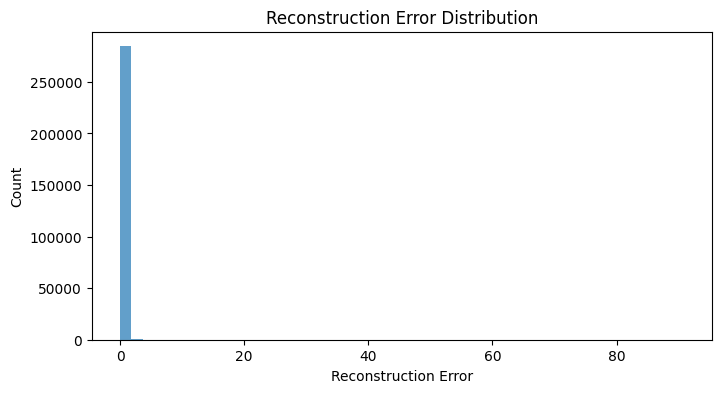

In [13]:
# Extra if asked
# Compute Reconstruction Error

reconstructed = autoencoder.predict(X_scaled)
mse = np.mean(np.square(X_scaled - reconstructed), axis=1)

# Add error column
data["Reconstruction_Error"] = mse

# Plot Reconstruction Error Distribution

plt.figure(figsize=(8,4))
plt.hist(mse, bins=50, alpha=0.7)
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.show()